## **Maestría en Inteligencia Artificial Aplicada**

### **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey

## **Adtividad Reto 1**

**Integrantes del equipo:**

* Giovanni Andrés Acuña Morales. Matrícula **A01794007**
* Luis Eduardo Rojas Zepeda Matrícula **A01794121**

# Limpieza de base de datos.

Instalamos libreria de mapas *GeoPandas*

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importamos Librerias

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, os, math, zipfile, requests, warnings, pydotplus

from sklearn.datasets import load_iris

from io import BytesIO
from sklearn import tree
from google.colab import drive
from IPython.display import Image
from shapely.geometry import Point
from sklearn.cluster import KMeans
from urllib3 import disable_warnings
from sklearn.pipeline import Pipeline
from sklearn import svm, datasets, tree
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from urllib3.exceptions import InsecureRequestWarning
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.metrics import confusion_matrix, recall_score, classification_report, make_scorer, accuracy_score, f1_score, precision_score
from sklearn.preprocessing import QuantileTransformer, power_transform, MinMaxScaler, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import learning_curve, validation_curve, cross_validate, RepeatedStratifiedKFold, GridSearchCV, train_test_split, RepeatedKFold

Tomamos la base de datos de ***Monitoreo de Aguas Subterraneas***

In [ ]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

response = requests.get(url)

zipfile.ZipFile(BytesIO(response.content)).extractall('unzipped_zip/')
df_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_sub.head(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,NO,NO,SI,NO,SI,SI,SI,SI,NO,NO


## Exploramos los datos

### Describe

Analizamos el DataFrame

In [ ]:
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [ ]:
df_sub.shape

(1068, 57)

In [ ]:
df_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [ ]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Con la información del DataFrame podemos identificar y separar las columnas **Categoricas** y **No Categoricas**.

In [ ]:
print(f'Columnas Categoricas')
print(f"{df_sub[['ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']].columns}\n")

print(f'Columnas No Categoricas')
print(f"{df_sub[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']].columns}\n")

print(f'Otras columnas')
print(f"CLAVE, SITIO, LONGITUD, LATITUD, PERIODO, CONTAMINANTES")

Columnas Categoricas
Index(['ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO',
       'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin',
       'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3',
       'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB',
       'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE'],
      dtype='object')

Columnas No Categoricas
Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L',
       'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
       'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
       'MN_TOT_mg/L', 'FE_TOT_mg/L'],
      dtype='object'

In [ ]:
df_limpio = df_sub[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in columnas_numericas:
  df_limpio[i].value_counts()

In [ ]:
df_limpio['ALC_mg/L'].value_counts()

157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64

### Box Plot

Ahora empezamos a analizar la columna "**Semaforo**" Atraves de una gráfica

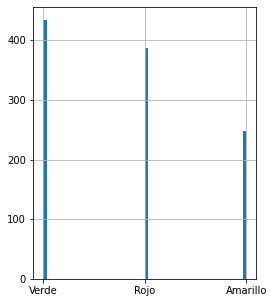

In [ ]:
df_semaforo = pd.DataFrame(df_sub['SEMAFORO'])
df_semaforo
df_semaforo['SEMAFORO'].hist(bins = 60, figsize=(4,5))

Ahora eliminamos el simbolo Menor que de las columnas Númericas para convertirlas en tipo flotantes.

In [ ]:
warnings.filterwarnings("ignore")

for name in columnas_numericas:
  df_limpio[name] = df_limpio[name].astype('str')
  df_limpio[name] = df_limpio[name].str.replace('<25','25') 
  df_limpio[name] = df_limpio[name].str.replace('<0.2','0.2') 
  df_limpio[name] = df_limpio[name].str.replace('<20','20') 
  df_limpio[name] = df_limpio[name].str.replace('<1.1','1.1')
  df_limpio[name] = df_limpio[name].str.replace('<0.02','0.02') 
  df_limpio[name] = df_limpio[name].str.replace('<0.01','0.01') 
  df_limpio[name] = df_limpio[name].str.replace('<0.003','0.003')
  df_limpio[name] = df_limpio[name].str.replace('<0.005','0.004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0005','0.0004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0015','0.0015') 
  df_limpio[name] = df_limpio[name].str.replace('<0.025','0.025')  
  df_limpio[name]= df_limpio[name].astype('float')

df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


Eliminamos la columna **SDT_mg/L** que está vácia

In [ ]:
df_limpio.drop('SDT_mg/L', axis=1, inplace=True)

Comprobamos la eliminación de la columna

In [ ]:
df_limpio.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

### Mean

Ahora obtenemos las imputaciones y lo realizaremos atravez de la media, con el objetivo de reducir el volumen de información.

In [ ]:
for name_column in df_limpio.columns:
  mediana = df_limpio[name_column].median() 
  df_limpio[name_column]= df_limpio[name_column].replace(np.nan, mediana)

df_limpio.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


Identificar medidas de posición no centrales , los cuartiles , outliers. Identificar correlaciones. Preparar los datos

In [ ]:
df_limpio.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.217212,0.079572,0.068860,0.243404,-0.016338,-0.000346,0.073458,0.032706,-0.014234,0.069779,0.016989,0.129942,0.043454
CONDUCT_mS/cm,0.217212,1.000000,0.286244,-0.025071,0.692656,0.018021,0.219881,-0.005047,0.029083,0.004436,0.057007,0.024816,0.095940,0.083172
SDT_M_mg/L,0.079572,0.286244,1.000000,-0.013709,0.347211,-0.001102,0.101522,-0.010092,0.010807,-0.000494,0.020332,0.002517,0.018963,0.020103
FLUORUROS_mg/L,0.068860,-0.025071,-0.013709,1.000000,-0.149549,0.003564,-0.019672,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.243404,0.692656,0.347211,-0.149549,1.000000,0.031772,0.301581,-0.106417,0.025010,0.007317,0.064998,-0.017304,0.083868,0.059789
COLI_FEC_NMP/100_mL,-0.016338,0.018021,-0.001102,0.003564,0.031772,1.000000,-0.000926,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,-0.000346,0.219881,0.101522,-0.019672,0.301581,-0.000926,1.000000,-0.007950,-0.009353,-0.015157,0.011367,-0.017317,-0.036810,0.013307
AS_TOT_mg/L,0.073458,-0.005047,-0.010092,0.444079,-0.106417,0.038151,-0.007950,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295
CD_TOT_mg/L,0.032706,0.029083,0.010807,-0.015123,0.025010,-0.001656,-0.009353,-0.009078,1.000000,-0.001824,-0.004631,-0.003080,-0.004205,-0.001036
CR_TOT_mg/L,-0.014234,0.004436,-0.000494,-0.005205,0.007317,-0.008938,-0.015157,-0.009698,-0.001824,1.000000,0.006998,-0.001149,-0.005112,0.000610


Ahora Graficamos un BoxPlot para mostrar los outliers

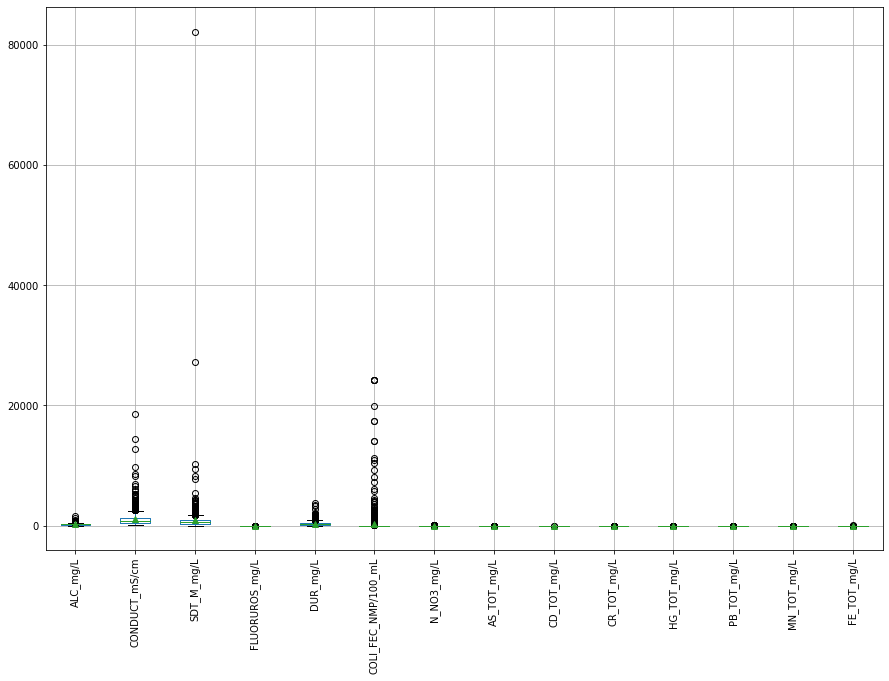

In [ ]:
outliers = df_limpio.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

Mediante la grafica del boxplot no se puede identificar los valores ya que hay campos dispersos, por lo que usaremos un mapa de calor

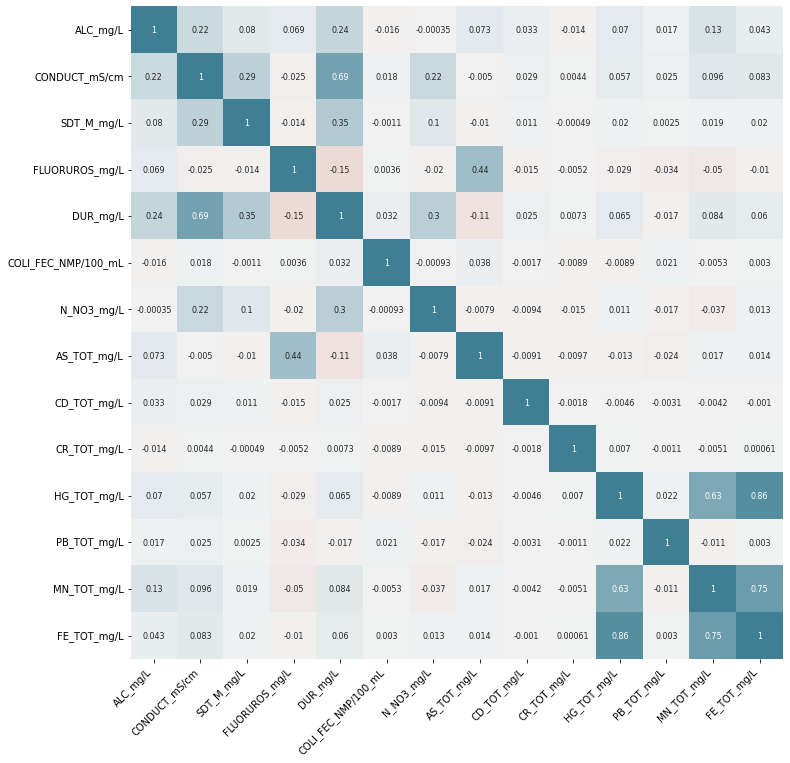

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
mi_correlacion = df_limpio.corr()

sns.heatmap(
    mi_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

En base de la información de latitud y longitud de la base de datos se evidencia que dicha ubicación corresponde al país de México.

In [ ]:
df_ubicacion = df_sub[['LONGITUD','LATITUD']]
print(f"{df_ubicacion.sample(10)}\n")
print(f"{df_semaforo.sample(10)}\n")

       LONGITUD    LATITUD
239 -104.481510  24.775880
688 -103.430710  25.506160
693 -103.077430  25.729760
268 -104.916110  26.250070
818 -111.032940  30.046050
384 -101.571150  19.851380
803 -111.524240  30.401850
754  -98.105556  24.943278
797 -110.979750  31.276810
432  -97.831000  18.954833

     SEMAFORO
867      Rojo
919  Amarillo
161      Rojo
27      Verde
435     Verde
853      Rojo
892     Verde
472      Rojo
776     Verde
973  Amarillo



Y ahora aplicamos la geolocalización en el plano geografico de México

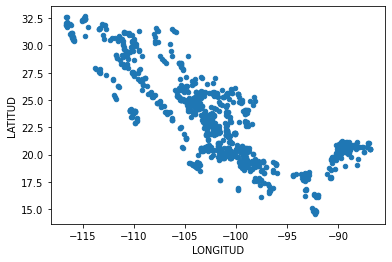

In [ ]:
df_ubicacion.plot.scatter('LONGITUD','LATITUD')

Cómo no tenemos el croquis o el mapa de México, necesitamos crear una lista donde almacenará la información de Latitud y longitud

In [ ]:
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


Y ahora agregaremos la lista creada al mapa diseñado previamente

,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


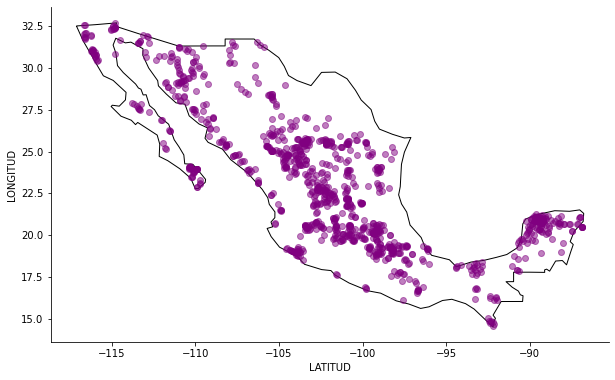

In [ ]:
puntos_en_mapa = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
puntos_en_mapa.plot(ax=gax, color='purple', alpha = 0.5)
puntos_en_mapa

Ahora agruparemos los puntos o ubicaciones y se difenciarán uno del otro por colores

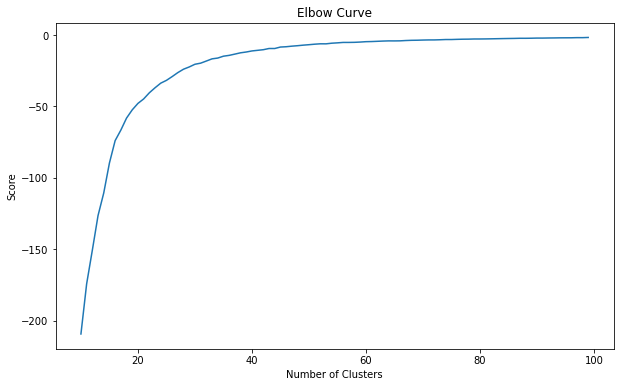

In [ ]:
numero_de_closters = range(10,100) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Con la gráfica anterior podemos evidecia que el punto de inflexión se encuentra en el cluster número 3, y con esto crearemos los Kmeans

In [ ]:
X = df_sub[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=20).fit(X)
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,-98.897779,19.479686,POINT (-98.89778 19.47969)
1,-109.032816,26.492841,POINT (-109.03282 26.49284)
2,-89.160918,20.578108,POINT (-89.16092 20.57811)
3,-102.513771,22.634623,POINT (-102.51377 22.63462)
4,-116.232448,31.325692,POINT (-116.23245 31.32569)
5,-101.004306,20.242898,POINT (-101.00431 20.24290)
6,-99.139244,24.194012,POINT (-99.13924 24.19401)
7,-97.095218,18.115311,POINT (-97.09522 18.11531)
8,-106.056653,24.758170,POINT (-106.05665 24.75817)
9,-110.332469,30.090431,POINT (-110.33247 30.09043)


Y agregaremos las siguientes columnas para el gráfico pueda identificar el color para cada grupo

In [ ]:
df_semaforo['SEMAPHORE'] = df_semaforo['SEMAFORO'].replace(to_replace = "Verde", value = "green")
df_semaforo['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
df_semaforo['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
df_semaforo.sample(10)

,SEMAFORO,SEMAPHORE
776,Verde,green
899,Verde,green
1066,Verde,green
81,Verde,green
868,Verde,green
799,Amarillo,yellow
155,Amarillo,yellow
1020,Amarillo,yellow
510,Verde,green
301,Rojo,red


In [ ]:
df_sub['CALIDAD_COLI_FEC'].value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

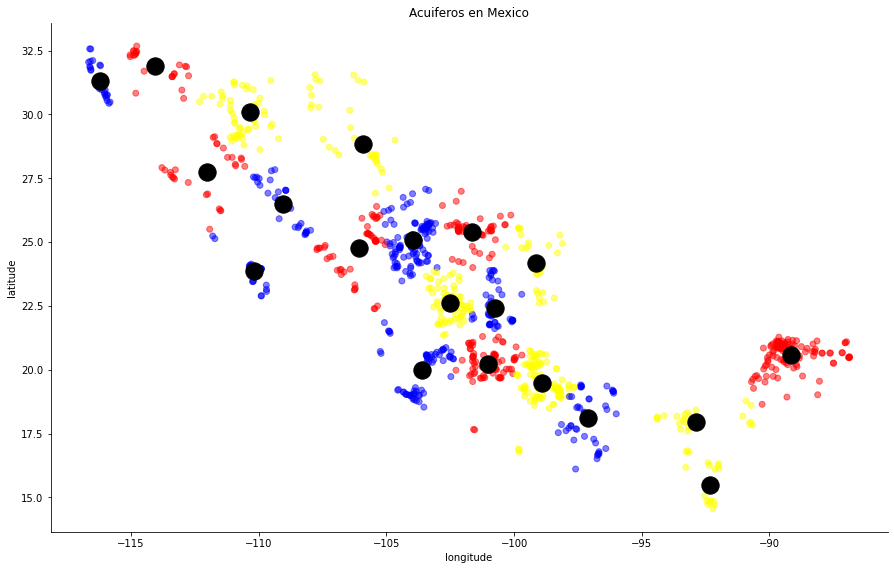

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))
colores = ['yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue','red','yellow','blue']
color_asig = []

for row in labels:
  color_asig.append(colores[row])


puntos_en_mapa.plot(ax=gax, color=color_asig, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

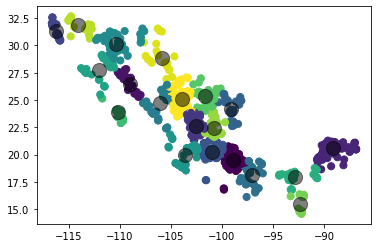

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Se agruparon los sitios por su ubicación en 3 grandes zonas del país.
<br><br>
Ahora se agruparán los sitios por su semáforo para determinar conjuntos de sitios cercanos con el mismo estado y encontrar patrones.

#Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
puntos_en_mapa['COLOR']= df_semaforo['SEMAFORO']
puntos_en_mapa['CLUSTER'] = labels
puntos_en_mapa

,LONGITUD,LATITUD,COORDENADAS,COLOR,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,3
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,3
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,3
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,3
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,13
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,6
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,6
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,6
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,6


In [ ]:
nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == 0].copy()
nuevo_dataset.shape

(111, 5)

In [ ]:
lista_de_modas=[]

for i in range(0,20):
  nuevo_dataset = pd.DataFrame() 
  nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == i].copy()
  moda = nuevo_dataset['COLOR'].mode()[0] 
  lista_de_modas.append(moda) 

len(lista_de_modas)

20

In [ ]:
puntos_centroides['MODA'] = lista_de_modas
puntos_centroides

,0,1,Coordinates,MODA
0,-98.897779,19.479686,POINT (-98.89778 19.47969),Verde
1,-109.032816,26.492841,POINT (-109.03282 26.49284),Amarillo
2,-89.160918,20.578108,POINT (-89.16092 20.57811),Amarillo
3,-102.513771,22.634623,POINT (-102.51377 22.63462),Rojo
4,-116.232448,31.325692,POINT (-116.23245 31.32569),Amarillo
5,-101.004306,20.242898,POINT (-101.00431 20.24290),Verde
6,-99.139244,24.194012,POINT (-99.13924 24.19401),Amarillo
7,-97.095218,18.115311,POINT (-97.09522 18.11531),Verde
8,-106.056653,24.758170,POINT (-106.05665 24.75817),Rojo
9,-110.332469,30.090431,POINT (-110.33247 30.09043),Verde


In [ ]:
lista_gringa = []

for i in range(0,20):
  if lista_de_modas[i] == 'Verde':
    lista_gringa.append('green')
  if lista_de_modas[i] == 'Rojo':
    lista_gringa.append('red')
  if lista_de_modas[i] == 'Amarillo':
    lista_gringa.append('yellow')

len(lista_gringa)

20

In [ ]:
lista_gringa_individual = []

for i in range(0,1068):
  if puntos_en_mapa.COLOR[i] == 'Verde':
    lista_gringa_individual.append('green')
  if puntos_en_mapa.COLOR[i] == 'Rojo':
    lista_gringa_individual.append('red')
  if puntos_en_mapa.COLOR[i] == 'Amarillo':
    lista_gringa_individual.append('yellow')

len(lista_gringa_individual)

1068

In [ ]:
print(puntos_centroides)
print(puntos_en_mapa)

             0          1                  Coordinates      MODA
0   -98.897779  19.479686   POINT (-98.89778 19.47969)     Verde
1  -109.032816  26.492841  POINT (-109.03282 26.49284)  Amarillo
2   -89.160918  20.578108   POINT (-89.16092 20.57811)  Amarillo
3  -102.513771  22.634623  POINT (-102.51377 22.63462)      Rojo
4  -116.232448  31.325692  POINT (-116.23245 31.32569)  Amarillo
5  -101.004306  20.242898  POINT (-101.00431 20.24290)     Verde
6   -99.139244  24.194012   POINT (-99.13924 24.19401)  Amarillo
7   -97.095218  18.115311   POINT (-97.09522 18.11531)     Verde
8  -106.056653  24.758170  POINT (-106.05665 24.75817)      Rojo
9  -110.332469  30.090431  POINT (-110.33247 30.09043)     Verde
10 -103.624279  19.996941  POINT (-103.62428 19.99694)      Rojo
11 -112.041948  27.728074  POINT (-112.04195 27.72807)     Verde
12  -92.861587  17.944769   POINT (-92.86159 17.94477)     Verde
13 -110.195427  23.861448  POINT (-110.19543 23.86145)      Rojo
14 -101.649766  25.410791

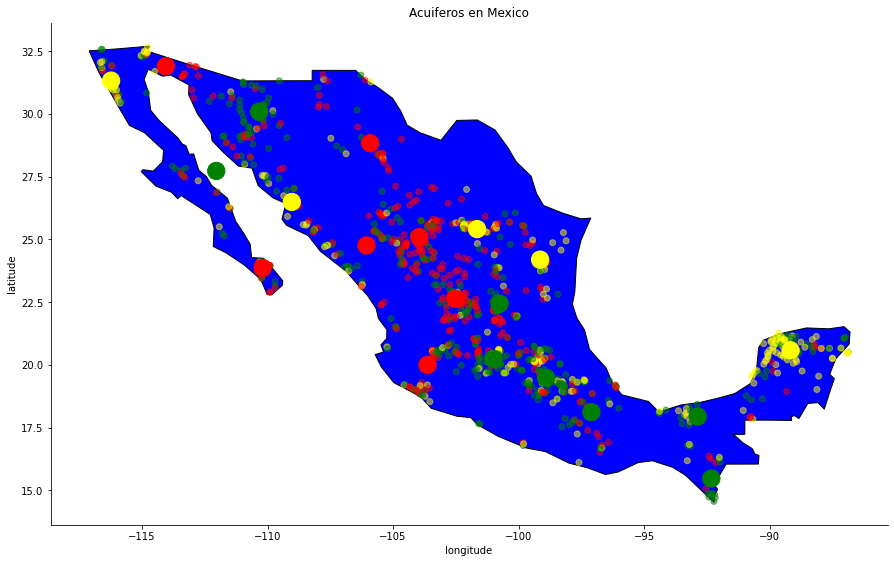

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))
color_asig = []
color_individual = puntos_en_mapa['COLOR']

for row in range(0,len(lista_gringa)):
  color_asig.append(lista_gringa[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='blue') #filtramos por pais

puntos_en_mapa.plot(ax=gax, color=lista_gringa_individual, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Acá obtenemos el valor por cada CLUSTER

In [ ]:

df_sub_copy = df_sub.copy(deep=True)
df_sub_copy['CLUSTER'] = labels
_clusters = df_sub_copy.groupby('CLUSTER')['CLUSTER'].count()
print(_clusters)


CLUSTER
0     111
1      31
2     119
3      77
4      27
5      78
6      34
7      43
8      50
9      60
10     65
11     27
12     28
13     34
14     53
15     15
16     48
17     24
18     26
19    118
Name: CLUSTER, dtype: int64


# **RETO 2**
#Clasificación-ensambles y presentación ejecutiva

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

##Selecciona tus variables independientes X y dependiente Y (semáforo)

In [ ]:
y = df_semaforo
print(df_limpio)
print(y)
print(X.shape)
print(y.shape)

      ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0      229.990          940.0    603.6000          0.9766  213.7320   
1      231.990          608.0    445.4000          0.9298  185.0514   
2      204.920          532.0    342.0000          1.8045  120.7190   
3      327.000          686.0    478.6000          1.1229  199.8790   
4      309.885         1841.0   1179.0000          0.2343  476.9872   
...        ...            ...         ...             ...       ...   
1063   231.045         2350.0   1545.8000          0.2000  752.0960   
1064   256.000          529.0    297.0000          0.2000  273.0000   
1065   330.690         2600.0   1873.0000          0.7574  660.2126   
1066   193.140          873.0    690.6667          0.7108  406.3680   
1067   263.070          817.0    495.0000          0.4002  362.5440   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0                     1.1    4.184656       0.0161        0.003    

##Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

Creamos una columna donde almacenará los colores del semaforo por números autoincrementable.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
y["SEMAFORO_Type"]= lbe.fit_transform(y["SEMAFORO"])
y["SEMAFORO_Type"].unique()

array([2, 1, 0])

##Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [ ]:
seed = 1
x_train, x_test, y_train, y_test = train_test_split(df_limpio, y[['SEMAFORO_Type']], test_size=0.2, random_state=seed)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(854, 14)
(214, 14)
(854, 1)
(214, 1)


Posteriormente se balancean las clases

In [ ]:
y_test.value_counts()

SEMAFORO_Type
2                90
1                78
0                46
dtype: int64

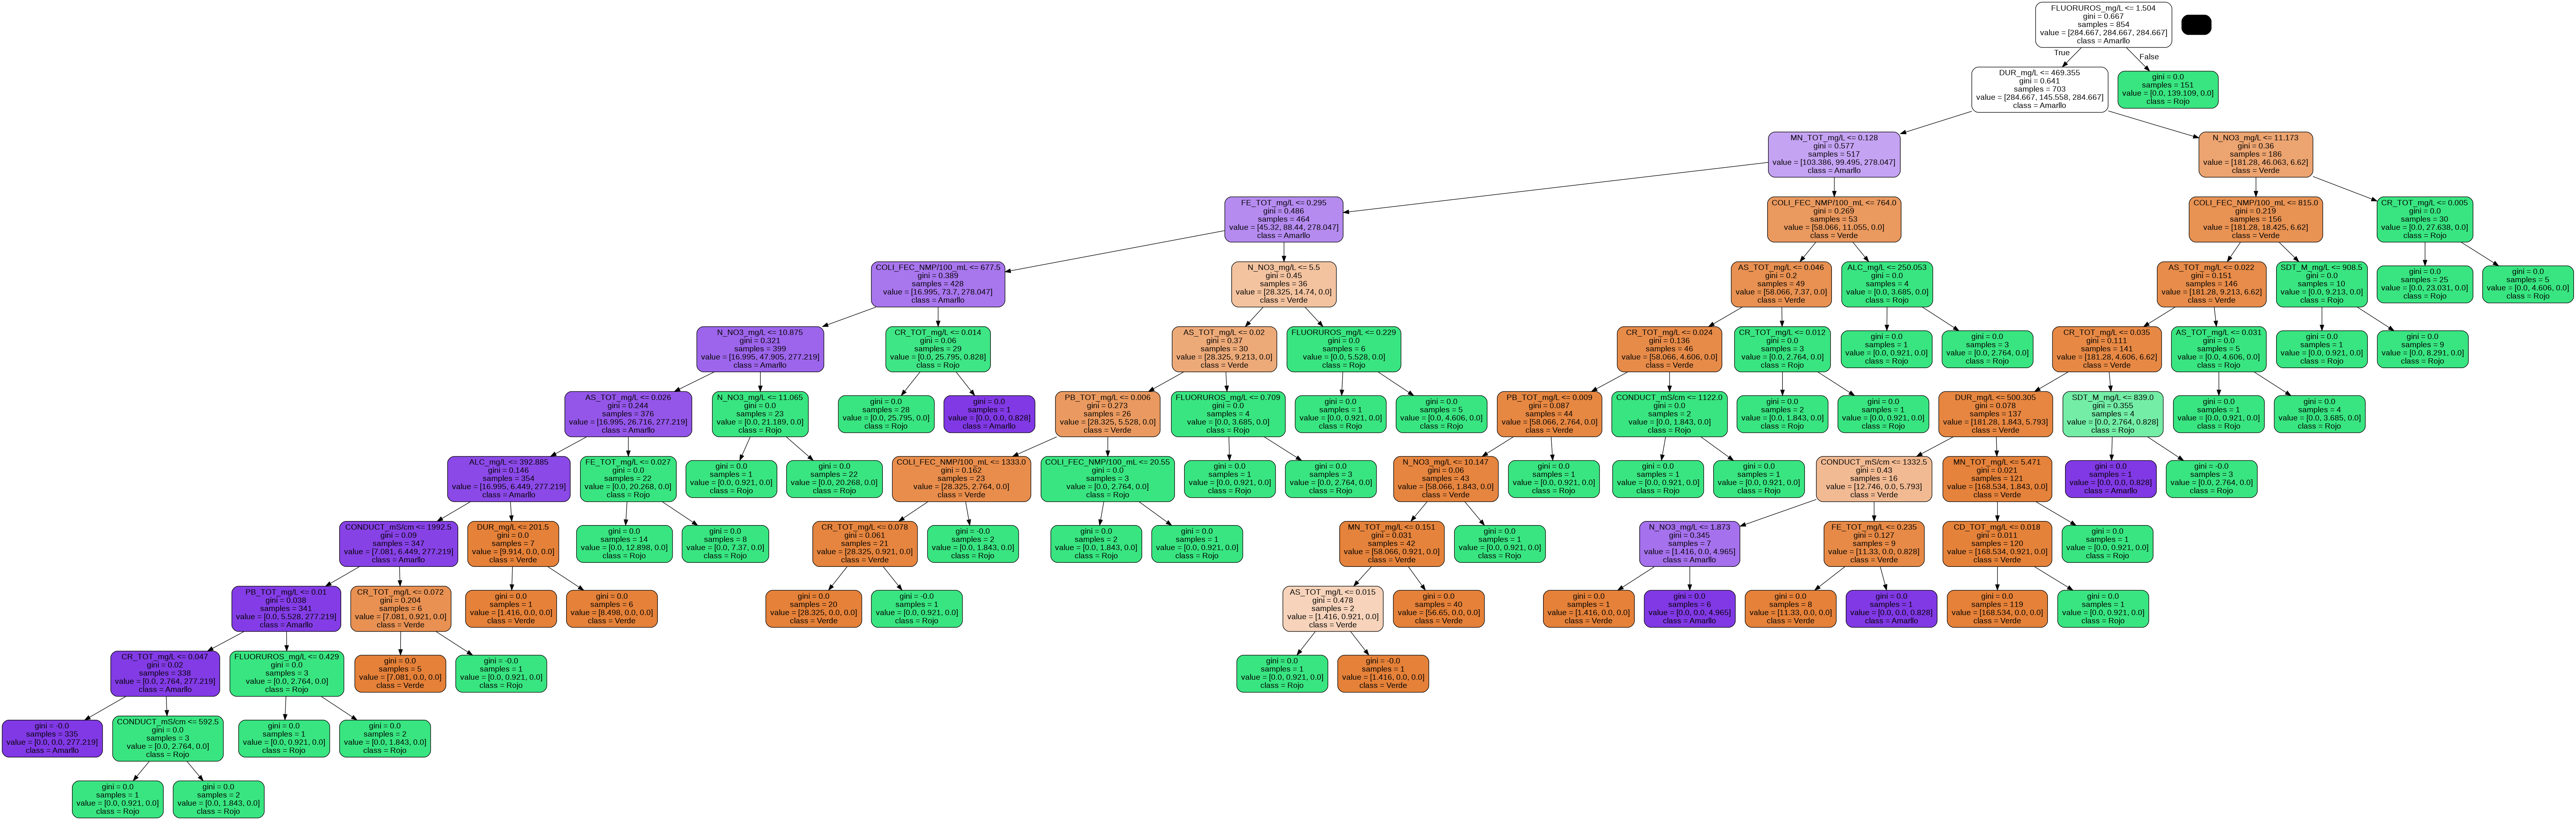

In [ ]:
tree_clasificator = tree.DecisionTreeClassifier(max_depth=12, random_state=42, class_weight='balanced')
tree_clasificator = tree_clasificator.fit(x_train, y_train)
arbol= export_graphviz (tree_clasificator,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)

graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol_colorido.png')
Image(filename = 'Arbol_colorido.png')

##Selecciona las variables de mayor importancia.

In [ ]:
def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)

Llamamos a la función **mi_accuracy**

In [ ]:
precition_tree = tree_clasificator.predict(x_test)

print(f'Obtenemos una exactitud de : {mi_accuracy(y_test,precition_tree)}')

Obtenemos una exactitud de : 0.9657320870480931


In [ ]:
x_train.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [ ]:
tree_clasificator.feature_importances_

array([0.03134488, 0.03137833, 0.00223714, 0.19458763, 0.1758013 ,
       0.09875868, 0.14068032, 0.09305425, 0.00321865, 0.03367256,
       0.        , 0.01982049, 0.1075146 , 0.06793118])

Generanos la gráfica con las variables más destacables

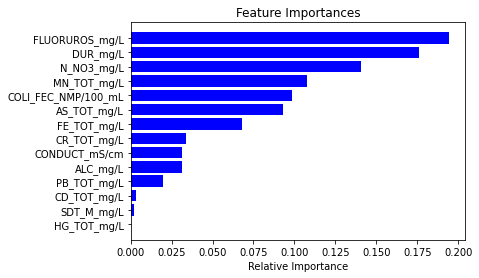

In [ ]:
importances = tree_clasificator.feature_importances_
indices = np.argsort(importances)
features= x_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

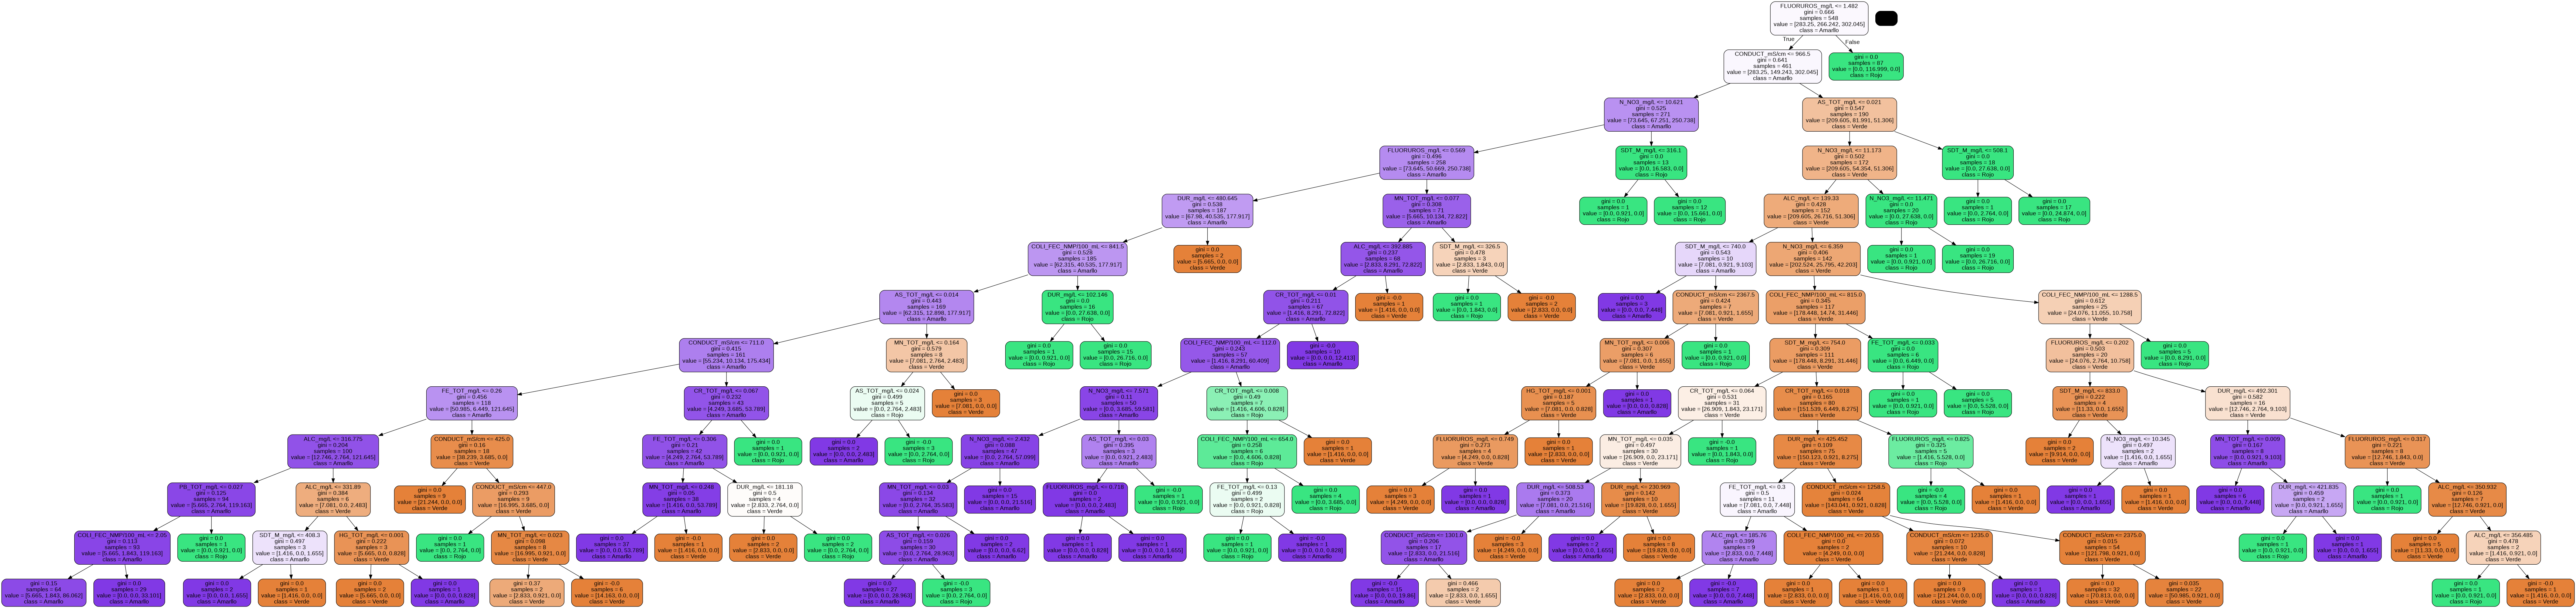

In [ ]:
forest = RandomForestClassifier(max_depth=12, random_state=42, class_weight='balanced') #Aqui nos va a balancear la salida
forest = forest.fit(x_train, y_train)
modelo_forest = forest[10]
arbol= export_graphviz (modelo_forest,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)


import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol_colorido.png')
Image(filename = 'Arbol_colorido.png')

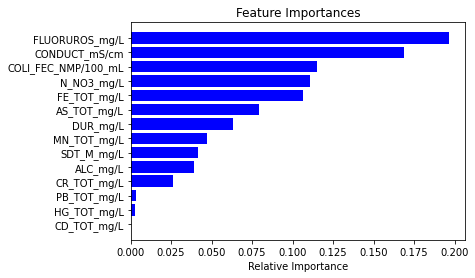

In [ ]:
importances = modelo_forest.feature_importances_
indices = np.argsort(importances)
features= x_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
precistion_forest = modelo_forest.predict(x_test)

print(f'contemplen mi exactitud: {mi_accuracy(y_test,precistion_forest)}')

contemplen mi exactitud: 0.9190031150941531


##Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [ ]:
classifiers = [
                ['DecisionTree :',tree_clasificator],
                ['RandomForest :',forest] 
              ]
              
predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, np.ravel(y_train))
    predictions = classifier.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, mi_accuracy(y_test, predictions))


DecisionTree : 0.9657320870480931
RandomForest : 0.9657320870480931


### Explora que clasificador es el más optimo, ejemplo:
*   Decision trees
*   Random Forest

## Determina el grado de exactitud a través del reporte de clasificación 

Creamos el proceso de votación.

In [ ]:
eclf1 = VotingClassifier(estimators=[ ('DecisionTree :' , tree_clasificator),('RandomForest :',forest)], voting='soft')
eclf1.fit(x_train, np.ravel(y_train))
predictions = eclf1.predict(x_test)
print("Votos Soft")
print(classification_report(y_test, predictions))
print("\n")

eclf2 = VotingClassifier(estimators=[  ('DecisionTree :' , tree_clasificator),('RandomForest :',forest)], voting='hard')
eclf2.fit(x_train, np.ravel(y_train))
predictions2 = eclf2.predict(x_test)
print("Votos Hard")
print(classification_report(y_test, predictions2))

Votos Soft
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        46
           1       0.94      0.97      0.96        78
           2       1.00      0.93      0.97        90

    accuracy                           0.95       214
   macro avg       0.94      0.95      0.94       214
weighted avg       0.95      0.95      0.95       214



Votos Hard
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        46
           1       0.96      0.95      0.95        78
           2       1.00      0.91      0.95        90

    accuracy                           0.94       214
   macro avg       0.93      0.95      0.94       214
weighted avg       0.95      0.94      0.94       214



Ahora creamos una función que mostrará el gráfico para representar las votaciones.

In [ ]:
def CM_modelo(modelo,X,y,X_test,y_test):

    modelo.fit(X, y)

    yhat = modelo.predict(x_test)

    cm = confusion_matrix(y_test, yhat)

    txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.show()


## Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Llamamos la función con cada una de las opciónes obtenido en el paso anterior

**Decision trees**

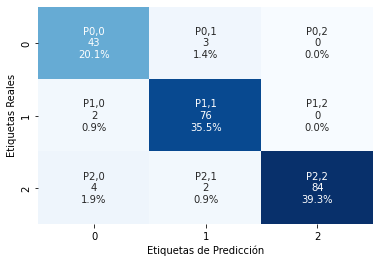

In [ ]:
CM_modelo(tree_clasificator,x_train,np.ravel(y_train),x_test,np.ravel(y_test))

**Random Forest**

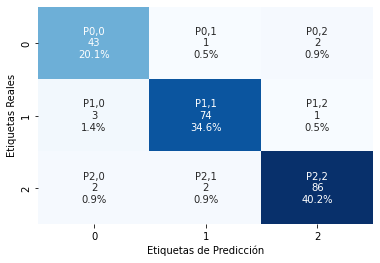

In [ ]:
CM_modelo(forest,x_train,np.ravel(y_train),x_test,np.ravel(y_test))